### What is Linear Regression?
Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between the dependent variable and one or more independent features by fitting a linear equation to observed data.

When there is only one independent feature, it is known as Simple Linear Regression, and when there are more than one feature, it is known as Multiple Linear Regression.

Similarly, when there is only one dependent variable, it is considered Univariate Linear Regression, while when there are more than one dependent variables, it is known as Multivariate Regression.

Simple Linear Regression
This is the simplest form of linear regression, and it involves only one independent variable and one dependent variable. The equation for simple linear regression is:
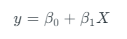



where:

* Y is the dependent variable
* X is the independent variable
* β0 is the intercept
* β1 is the slope

### Multiple Linear Regression
This involves more than one independent variable and one dependent variable. The equation for multiple linear regression is:

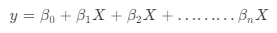 

where:

* Y is the dependent variable
* X1, X2, …, Xp are the independent variables
* β0 is the intercept
* β1, β2, …, βn are the slopes

### What is the best Fit Line?
Our primary objective while using linear regression is to locate the best-fit line, which implies that the error between the predicted and actual values should be kept to a minimum. There will be the least error in the best-fit line.

The best Fit Line equation provides a straight line that represents the relationship between the dependent and independent variables. The slope of the line indicates how much the dependent variable changes for a unit change in the independent variable(s).

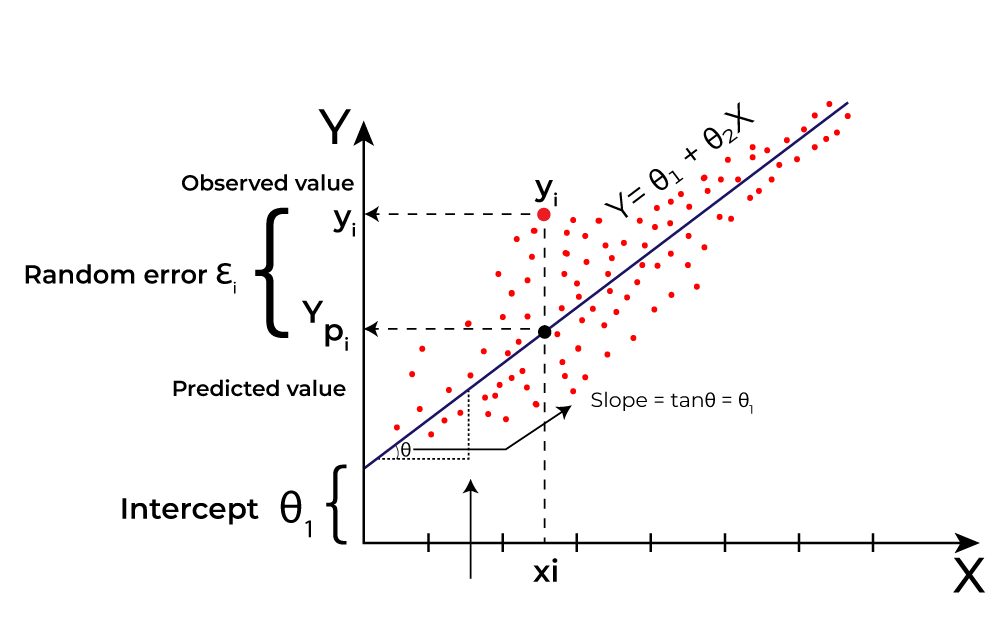 


### Hypothesis function in Linear Regression
As we have assumed earlier that our independent feature is the experience i.e X and the respective salary Y is the dependent variable. Let’s assume there is a linear relationship between X and Y then the salary can be predicted using:

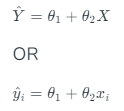 

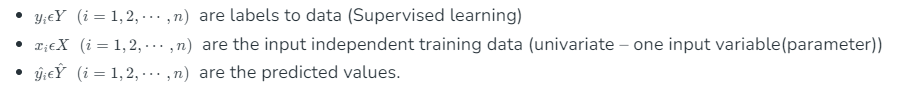 

The model gets the best regression fit line by finding the best θ1 and θ2 values. 

* θ1: intercept 
* θ2: coefficient of x 

Once we find the best θ1 and θ2 values, we get the best-fit line. So when we are finally using our model for prediction, it will predict the value of y for the input value of x. 

How to update θ1 and θ2 values to get the best-fit line? 

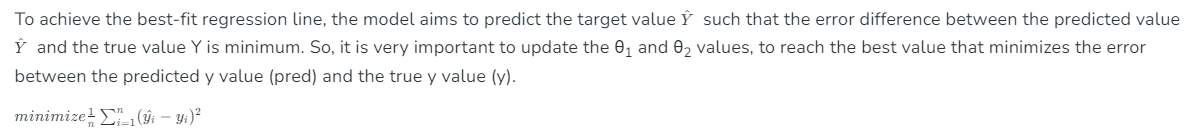 

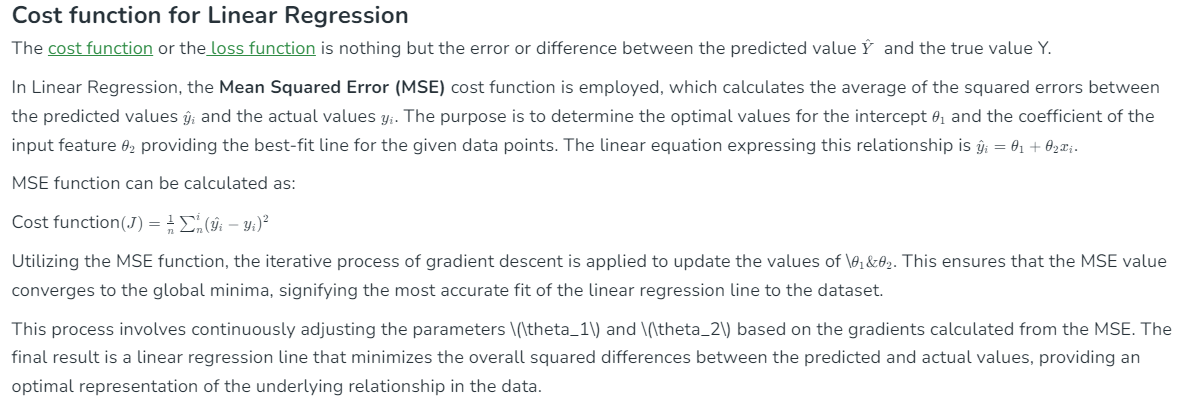 

### Gradient Descent for Linear Regression
A linear regression model can be trained using the optimization algorithm gradient descent by iteratively modifying the model’s parameters to reduce the mean squared error (MSE) of the model on a training dataset. To update θ1 and θ2 values in order to reduce the Cost function (minimizing RMSE value) and achieve the best-fit line the model uses Gradient Descent. The idea is to start with random θ1 and θ2 values and then iteratively update the values, reaching minimum cost. 

A gradient is nothing but a derivative that defines the effects on outputs of the function with a little bit of variation in inputs.

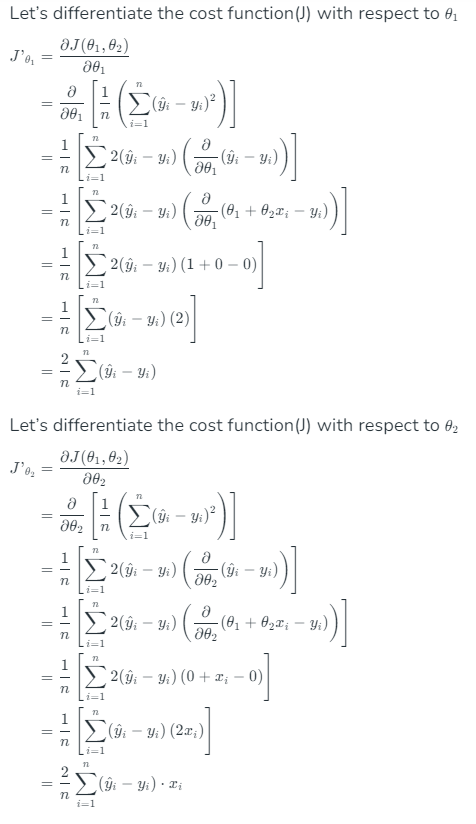 

Finding the coefficients of a linear equation that best fits the training data is the objective of linear regression. By moving in the direction of the Mean Squared Error negative gradient with respect to the coefficients, the coefficients can be changed. And the respective intercept and coefficient of X will be if alpha
     
α  is the learning rate.

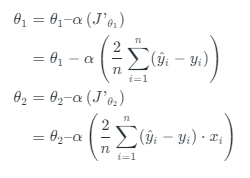 

### Assumptions of Simple Linear Regression
Linear regression is a powerful tool for understanding and predicting the behavior of a variable, however, it needs to meet a few conditions in order to be accurate and dependable solutions. 

1. Linearity: The independent and dependent variables have a linear relationship with one another. This implies that changes in the dependent variable follow those in the independent variable(s) in a linear fashion. This means that there should be a straight line that can be drawn through the data points. If the relationship is not linear, then linear regression will not be an accurate model.

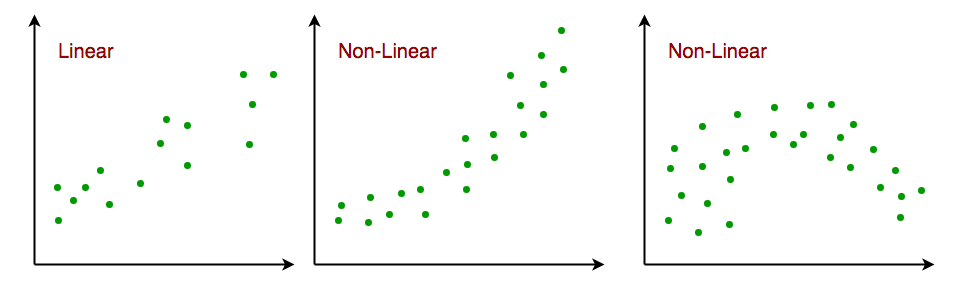 

2. Independence: The observations in the dataset are independent of each other. This means that the value of the dependent variable for one observation does not depend on the value of the dependent variable for another observation. If the observations are not independent, then linear regression will not be an accurate model.

3. Homoscedasticity: Across all levels of the independent variable(s), the variance of the errors is constant. This indicates that the amount of the independent variable(s) has no impact on the variance of the errors. If the variance of the residuals is not constant, then linear regression will not be an accurate model.

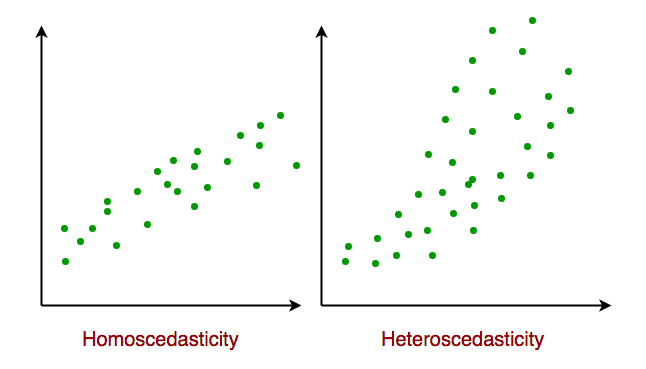 

Assumptions of Multiple Linear Regression
For Multiple Linear Regression, all four of the assumptions from Simple Linear Regression apply. In addition to this, below are few more:

1. No multicollinearity: There is no high correlation between the independent variables. This indicates that there is little or no correlation between the independent variables. Multicollinearity occurs when two or more independent variables are highly correlated with each other, which can make it difficult to determine the individual effect of each variable on the dependent variable. If there is multicollinearity, then multiple linear regression will not be an accurate model.

2. Additivity: The model assumes that the effect of changes in a predictor variable on the response variable is consistent regardless of the values of the other variables. This assumption implies that there is no interaction between variables in their effects on the dependent variable.

3. Feature Selection: In multiple linear regression, it is essential to carefully select the independent variables that will be included in the model. Including irrelevant or redundant variables may lead to overfitting and complicate the interpretation of the model.

4. Overfitting: Overfitting occurs when the model fits the training data too closely, capturing noise or random fluctuations that do not represent the true underlying relationship between variables. This can lead to poor generalization performance on new, unseen data.

### Multicollinearity
Multicollinearity is a statistical phenomenon that occurs when two or more independent variables in a multiple regression model are highly correlated, making it difficult to assess the individual effects of each variable on the dependent variable.

Detecting Multicollinearity includes two techniques:

* Correlation Matrix: Examining the correlation matrix among the independent variables is a common way to detect multicollinearity. High correlations (close to 1 or -1) indicate potential multicollinearity.

* VIF (Variance Inflation Factor): VIF is a measure that quantifies how much the variance of an estimated regression coefficient increases if your predictors are correlated. A high VIF (typically above 10) suggests multicollinearity.

### Evaluation Metrics for Linear Regression

A variety of evaluation measures can be used to determine the strength of any linear regression model. These assessment metrics often give an indication of how well the model is producing the observed outputs.

The most common measurements are:

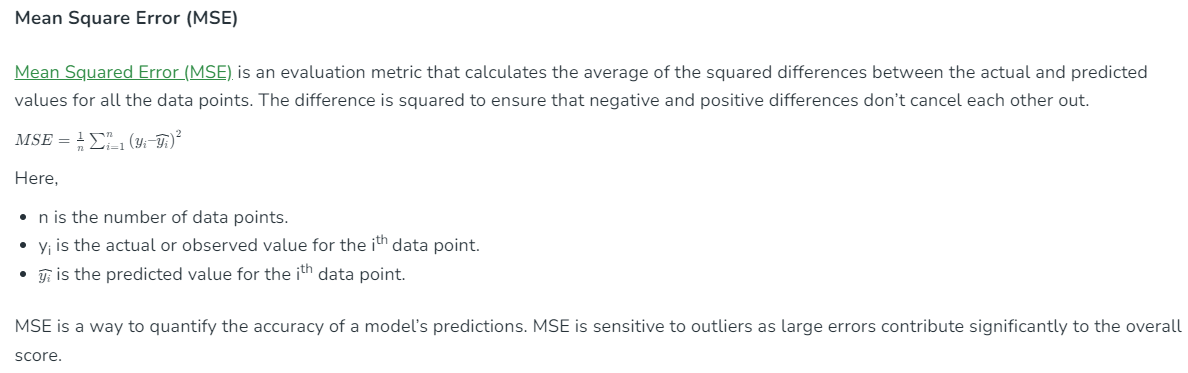 

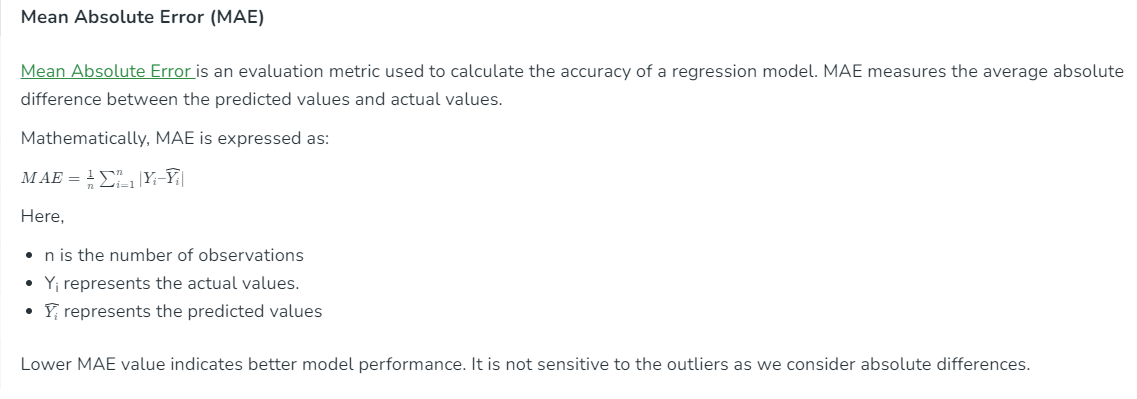 

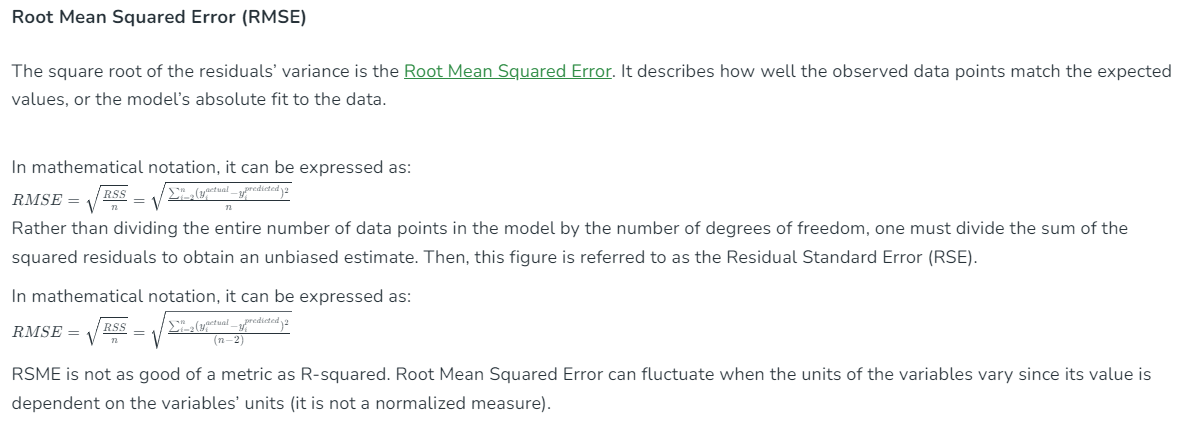 

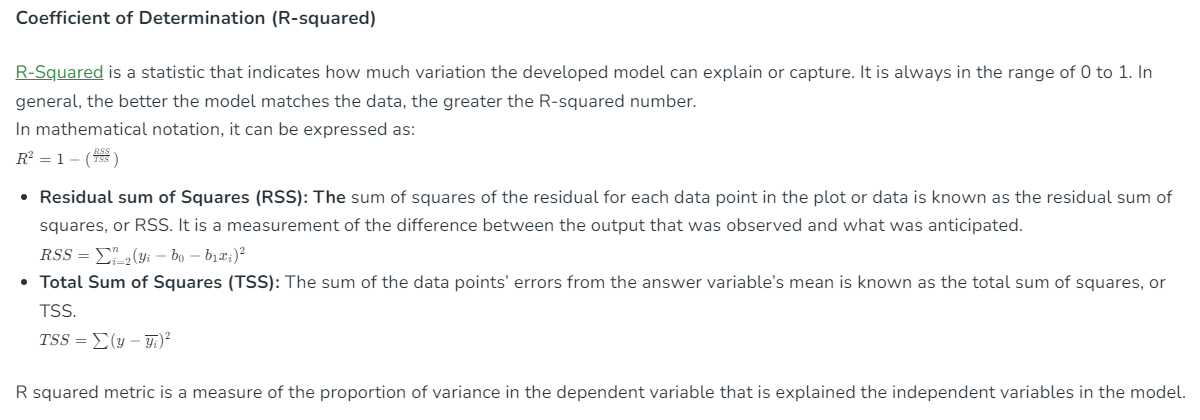 

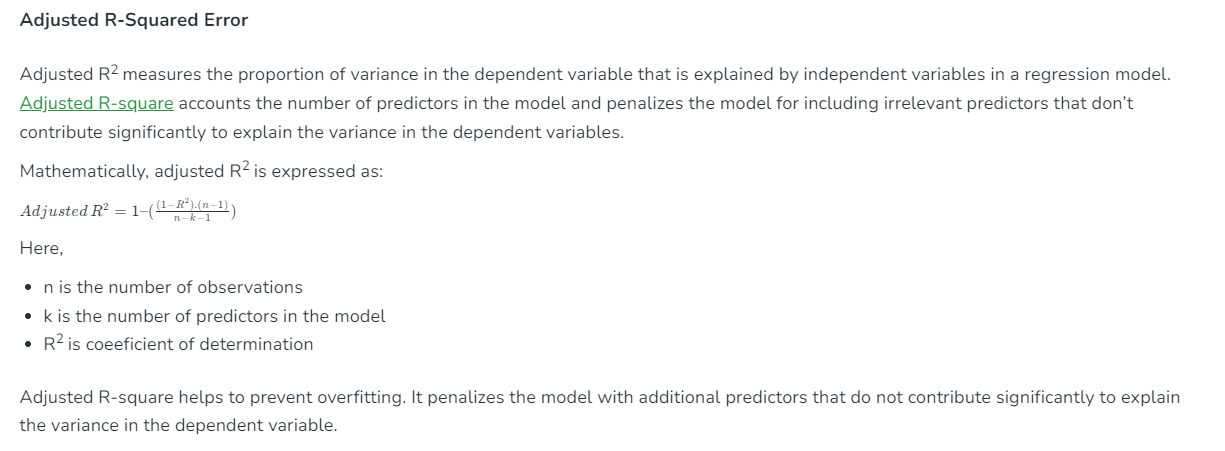 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [3]:
data = pd.read_csv("data_for_lr.csv")
data

# Drop the missing values
data = data.dropna()

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

In [4]:
class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, train_input) + c 
        return predictions 

    def cost_function(self, predictions, train_output): 
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predictions): 
        derivatives = {} 
        df = (predictions-train_output) 
        # dm= 2/n * mean of (predictions-actual) * input 
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        # dc = 2/n * mean of (predictions-actual) 
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        # Initialize random parameters 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss 
        self.loss = [] 

        # Initialize figure and axis for animation 
        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input), max(train_input), 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', 
                color='green', label='Training Data') 

        # Set y-axis limits to exclude negative values 
        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
            # Forward propagation 
            predictions = self.forward_propagation(train_input) 

            # Cost function 
            cost = self.cost_function(predictions, train_output) 

            # Back propagation 
            derivatives = self.backward_propagation( 
                train_input, train_output, predictions) 

            # Update parameters 
            self.update_parameters(derivatives, learning_rate) 

            # Update the regression line 
            line.set_ydata(self.parameters['m'] 
                        * x_vals + self.parameters['c']) 

            # Append loss and print 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 

            return line, 
        # Create animation 
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 

        # Save the animation as a video file (e.g., MP4) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss 


MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 7209.823376064291
Iteration = 1, Loss = 875.7423579049738
Iteration = 1, Loss = 112.41666334493446
Iteration = 1, Loss = 20.427609937825753
Iteration = 2, Loss = 9.341927720855958
Iteration = 3, Loss = 8.005982176534065
Iteration = 4, Loss = 7.844986004395612
Iteration = 5, Loss = 7.82558401820435
Iteration = 6, Loss = 7.823245672361381
Iteration = 7, Loss = 7.82296368089793
Iteration = 8, Loss = 7.822929502535502
Iteration = 9, Loss = 7.822925188368291
Iteration = 10, Loss = 7.822924473181283
Iteration = 11, Loss = 7.8229241917302295
Iteration = 12, Loss = 7.822923962568753
Iteration = 13, Loss = 7.822923739728408
Iteration = 14, Loss = 7.822923517669497
Iteration = 15, Loss = 7.822923295724421
Iteration = 16, Loss = 7.8229230738127296
Iteration = 17, Loss = 7.822922851924721
Iteration = 18, Loss = 7.822922630059225
Iteration = 19, Loss = 7.8229224082161055
Iteration = 20, Loss = 7.822922186395335


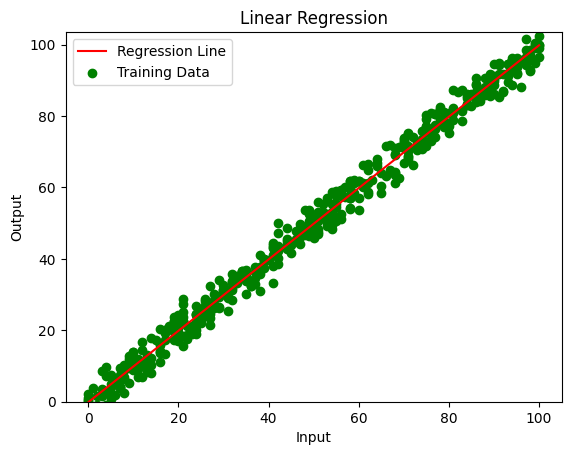

In [5]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)
